<div style="text-align: center;"> <h3>Linear Model</h3>
<h5>Problem Set 2</h5>
<h5>April 22, 2025</h5>    
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

## Internet Use and GDP

The U.S. Central Intelligence Agency (2010) contains information on topics such as geography, people, the economy, communications, and transportation for most countries in the world. For example, the INTERNET data file contains data from 2010 relating to gross domestic product (GDP) per capita in thousands of dollars (Gdp) and the percentage of the population that are Internet users (Int) for 212 countries. Here, GDP is based on purchasing power parities to account for between-country differences in price levels. This problem investigates whether there is a linear association between these two variables. In particular, **how effective is it to use Gdp to predict Int using simple linear regression?**

In [1]:
library(tidyverse)
library(ggplot2)

options(repr.plot.width=10, repr.plot.height=5)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv("internet.csv")
head(df)

Rows: 212 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Country
dbl (2): Gdp, Int

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,Gdp,Int
<chr>,<dbl>,<dbl>
Afghanistan,1.0,3.4
Albania,7.4,43.4
Algeria,7.4,13.4
Andorra,46.7,79.1
Angola,8.7,4.5
Anguilla,12.2,24.5


In [3]:
nrow(df)

[1] 212

In [4]:
summary(df)

   Country               Gdp              Int        
 Length:212         Min.   : 0.300   Min.   : 0.200  
 Class :character   1st Qu.: 2.575   1st Qu.: 7.075  
 Mode  :character   Median : 9.150   Median :27.350  
                    Mean   :14.842   Mean   :32.562  
                    3rd Qu.:22.125   3rd Qu.:53.750  
                    Max.   :81.800   Max.   :97.000  

#### (a) Find the least squares line for the data, that is, use statistical software to find the intercept and slope of the least squares line, and write out the equation of that line.


Call:
lm(formula = Int ~ Gdp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.742 -11.914  -3.276   9.417  63.644 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.36278    1.71827   7.195 1.09e-11 ***
Gdp          1.36093    0.07975  17.065  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.14 on 210 degrees of freedom
Multiple R-squared:  0.581,	Adjusted R-squared:  0.579 
F-statistic: 291.2 on 1 and 210 DF,  p-value: < 2.2e-16


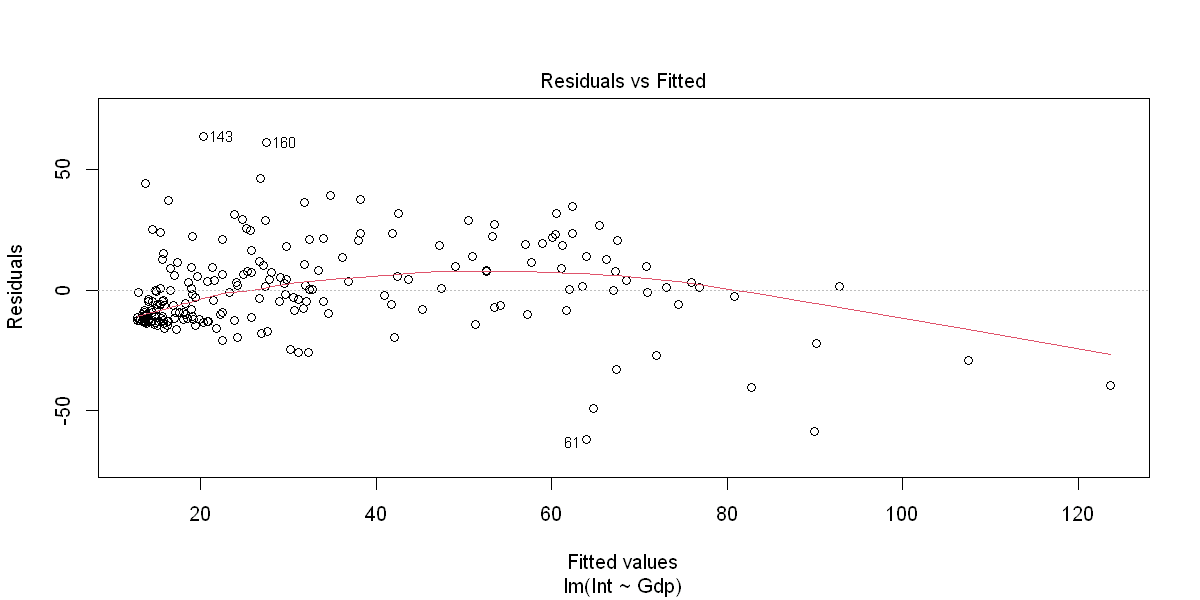

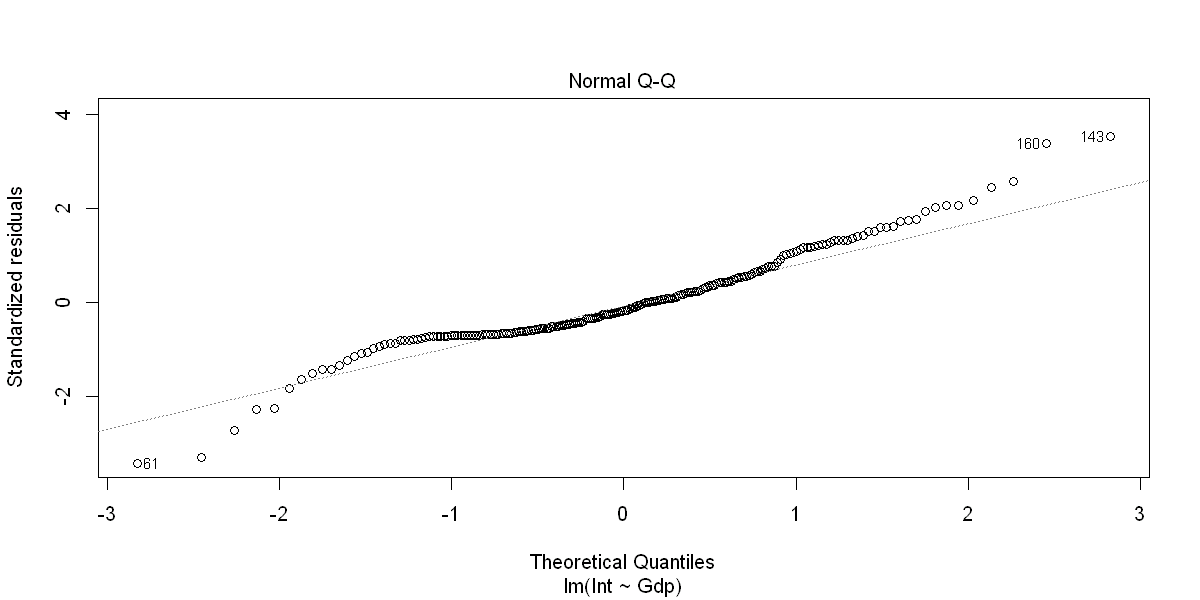

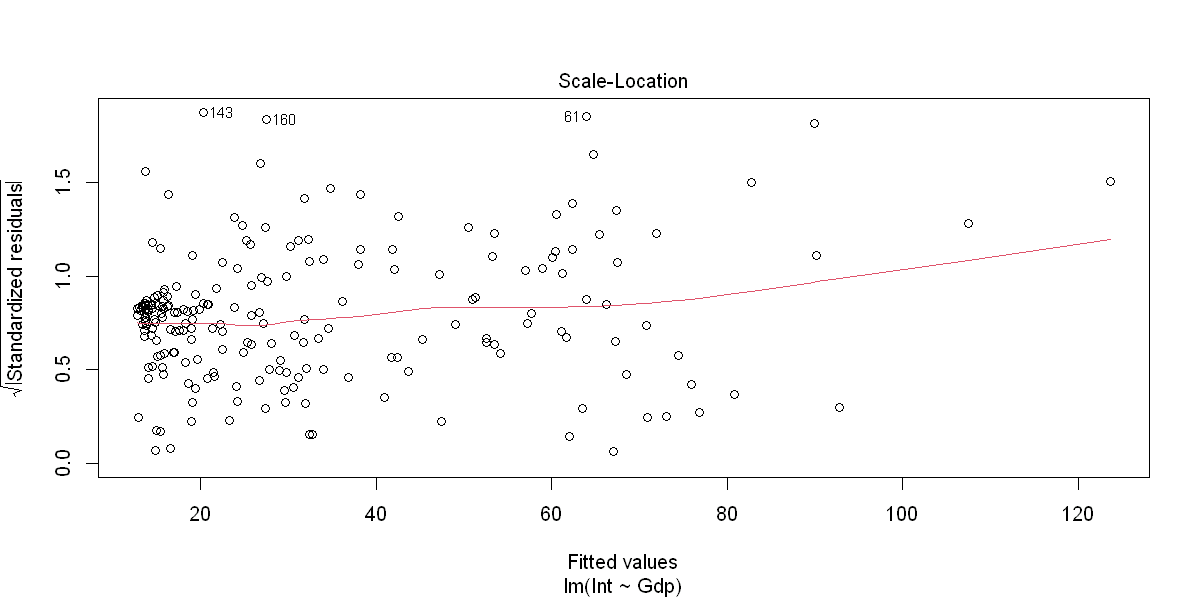

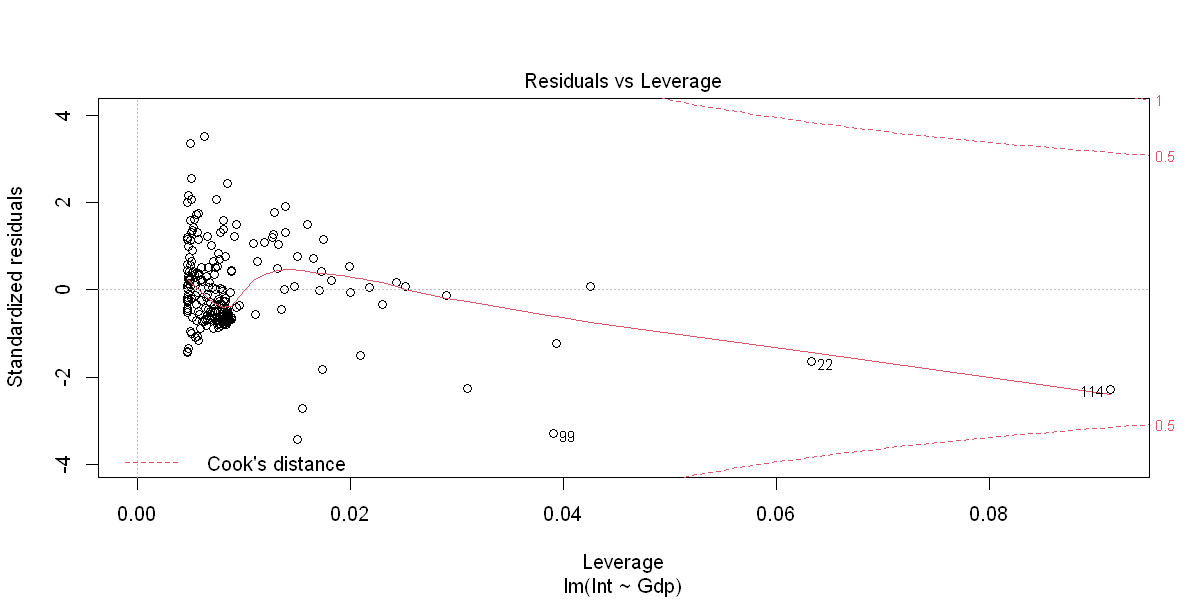

In [5]:
first <- lm(Int ~ Gdp, data = df)
summary(first)
plot(first)

The `Residuals vs Fitted` plot showed a randomly distributed residuals around the fitted line as there's no discernable pattern of either decreasing or increasing in residuals as the fitted values increases. This indicates that the errors terms are independent. 

The `Normal Q-Q` plot on the other hand estimates that the residual distribution does not stray too far away from normal distribution. 

The `Scale-Location` shows a relatively horizantal line accross all range of fitted values indicating an approximately equal in variance.

Therefore, we could get `Int` as a linear function of `Gdp` plus some error.

In [6]:
coefs <- coef(first)

slope = coefs[2]
intercept = coefs[1]

print(paste("Slope:", slope))
print(paste("Intercept:", intercept))

[1] "Slope: 1.36092659265485"
[1] "Intercept: 12.3627753941145"


The regression line can then be written as:

$$
E(INT) = 1.36092659265485\cdot GDP +  12.3627753941145
$$

#### (b) Interpret the estimates of the slope and the intercept in the context of the problem.

The slope of $1.36092659265485$ indicates that the `Int` (or the percentage of population in a country that are internet users) increases by $1.36092659265485$ unit for every unit increase in `GDP` (or the gross domestic product per capita in thousands of dollars). 

The intercept of $12.3627753941145$ indicates that if `GDP=0`,. `INT` has a default value of $12.3627753941145$ which doesn't make sense but the intercept of the linear model is simply a mathematical extrapolation beyond the observable data range, at least in this case. This interpretation is more of theorethical than practical due to the fact that the range of the independent variable doesn't include 0.

#### (c) Predict the percentage of Internet users if GDP per capita is $20,000.

In [7]:
gdp = 20000 

manual_prediction <- intercept + slope * (gdp/1000) # Gdp is in thousands
print(manual_prediction)

(Intercept) 
   39.58131 


#### (d) Draw a scatterplot with Int on the vertical axis and Gdp on the horizontal axis, and add the least squares line to the plot.

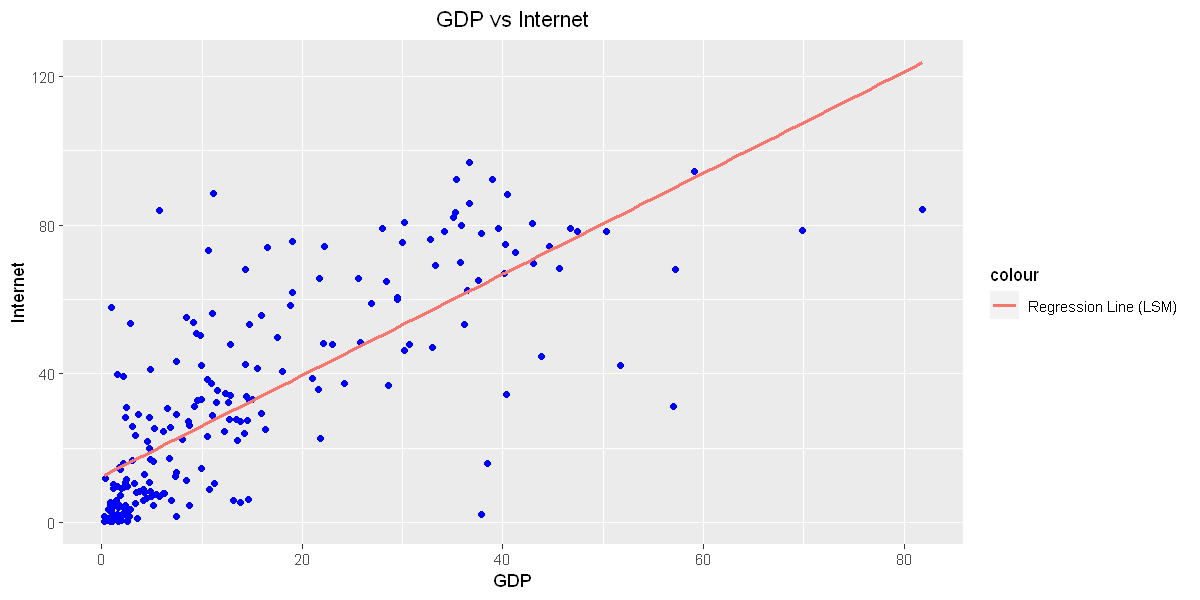

In [8]:
ggplot(df) +
  geom_point(aes(x = Gdp, y = Int), col = "blue") +
  geom_smooth(aes(x = Gdp, y = Int, color = "Regression Line (LSM)"), 
              method = "lm", se = FALSE, formula = y ~ x, linewidth = 1) +
  ggtitle("GDP vs Internet") + 
  ylab("Internet") + 
  xlab("GDP") +
  theme(plot.title = element_text(hjust = 0.5)) 

## Movie Data and Box Office Receipts

The MOVIES data file contains data on 25 movies from “The Internet Movie Database” (www.imdb.com). Based on this dataset, we wish to investigate whether all-time US box office receipts (Box, in millions of US dollars unadjusted for inflation) are associated with any of the following variables:
* Rate = Internet Movie Database user rating (out of 10)
* User = Internet Movie Database users rating the movie (in thousands)
* Meta = “Metascore” based on 35 critic reviews (out of 100)
* Len = Runtime (in minutes)
* Win = Award wins
* Nom = Award nominations

Theatrical box office receipts (movie ticket sales) may include theatrical re-release receipts, but exclude video rentals, television rights, and other revenues.

In [9]:
df_2 <- read_csv("movies.csv")

head(df_2)

summary(df_2)

Rows: 25 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (1): Movie
dbl (7): Box, Rate, User, Meta, Len, Win, Nom

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Movie,Box,Rate,User,Meta,Len,Win,Nom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Star Wars: Episode IV - A New Hope (1977),460.9357,8.8,423.838,91,121,36,22
Toy Story 3 (2010),414.9845,8.5,201.748,92,103,35,41
Spider-Man 2 (2004),373.3779,7.5,191.179,83,127,15,39
Finding Nemo (2003),339.7144,8.1,263.202,89,100,35,36
The Lion King (1994),328.4230,8.3,233.977,83,89,27,22
Pirates of the Caribbean: The Curse of the Black Pearl (2003),305.3887,8.0,355.801,63,143,28,74


    Movie                Box             Rate            User       
 Length:25          Min.   :100.3   Min.   :5.300   Min.   : 25.51  
 Class :character   1st Qu.:118.2   1st Qu.:6.300   1st Qu.: 57.84  
 Mode  :character   Median :215.4   Median :7.100   Median :125.89  
                    Mean   :220.3   Mean   :7.024   Mean   :141.93  
                    3rd Qu.:293.0   3rd Qu.:8.000   3rd Qu.:191.18  
                    Max.   :460.9   Max.   :8.800   Max.   :423.84  
      Meta            Len             Win             Nom       
 Min.   :25.00   Min.   : 89.0   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:45.00   1st Qu.: 98.0   1st Qu.: 3.00   1st Qu.: 7.00  
 Median :64.00   Median :115.0   Median : 9.00   Median :15.00  
 Mean   :63.08   Mean   :114.7   Mean   :13.64   Mean   :19.56  
 3rd Qu.:81.00   3rd Qu.:126.0   3rd Qu.:18.00   3rd Qu.:28.00  
 Max.   :92.00   Max.   :157.0   Max.   :56.00   Max.   :74.00  

#### (a) Write out a regression equation for a multiple linear regression model for predicting response Box from just three predictors: Rate, User, and Meta.

In [10]:
predictors = c('Rate', 'User', 'Meta')

X <- df_2 %>%
    select(all_of(predictors))

y <- df_2$Box

second <- lm(y ~ . , data=X)

summary(second)


Call:
lm(formula = y ~ ., data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.202 -22.749  -3.598   7.266  90.059 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -169.0862    92.0925  -1.836  0.08055 . 
Rate          35.4962    18.9956   1.869  0.07569 . 
User           0.4328     0.1472   2.940  0.00783 **
Meta           1.2462     0.8047   1.549  0.13640   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.53 on 21 degrees of freedom
Multiple R-squared:  0.8841,	Adjusted R-squared:  0.8675 
F-statistic: 53.37 on 3 and 21 DF,  p-value: 5.35e-10


$$
E(Box) = 35.4962 \cdot Rate + 0.4328 \cdot User + 1.2462 \cdot Meta - 169.0862 
$$

#### (b) Interpret the estimated regression parameter for Rate in the context of the problem.

The coefficient of the `Rate` indicates that the `Box` value of a specific movie increase by $35.4962$ unit for every increase in its rating on Internet Movie Database (`Rate`).


#### (c) Look at the graph produced by the ”plot” function to do assumption checks for the model in item (a)

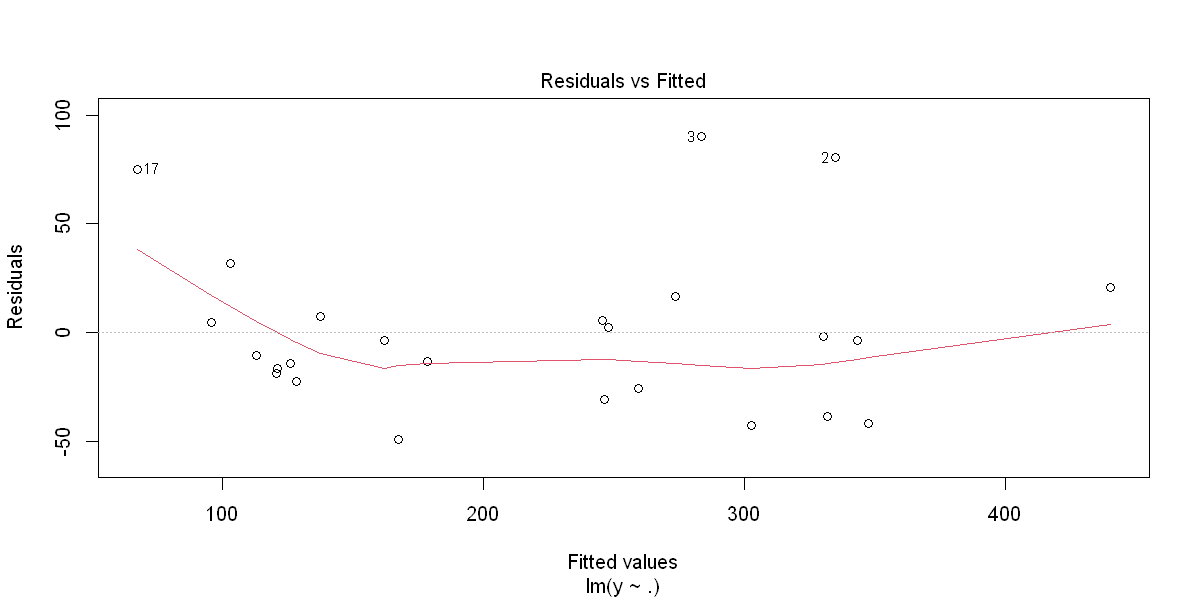

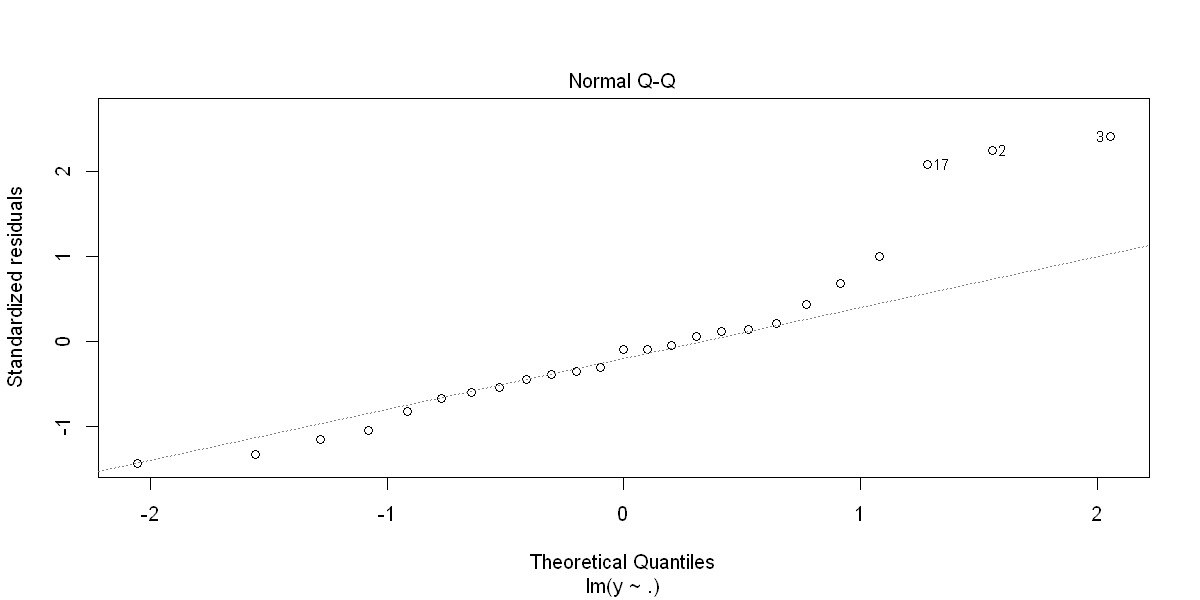

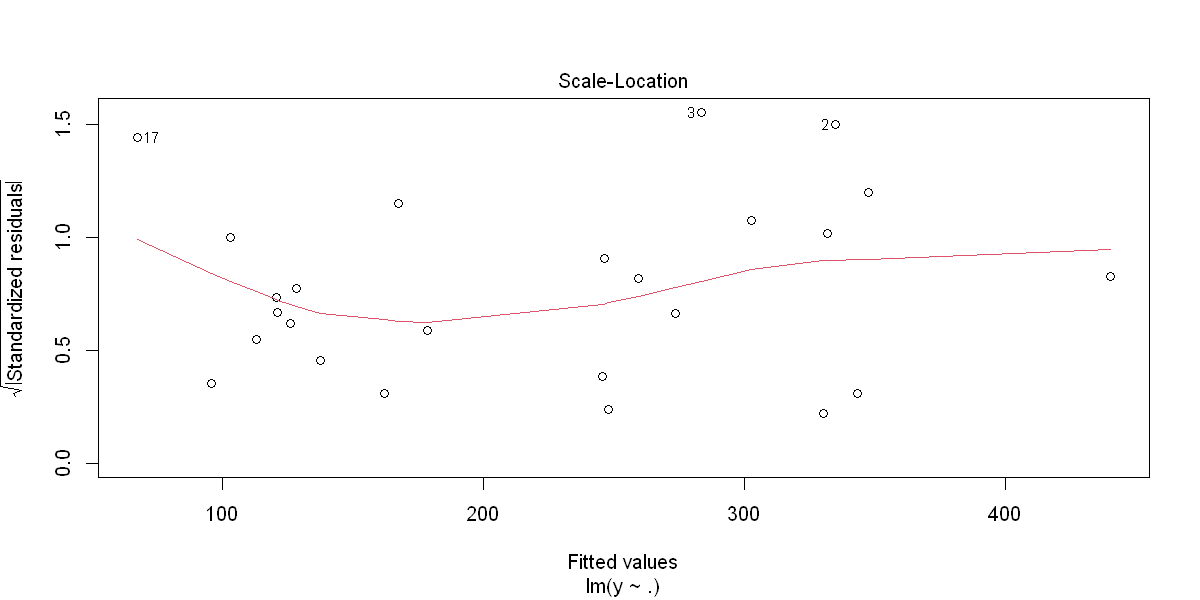

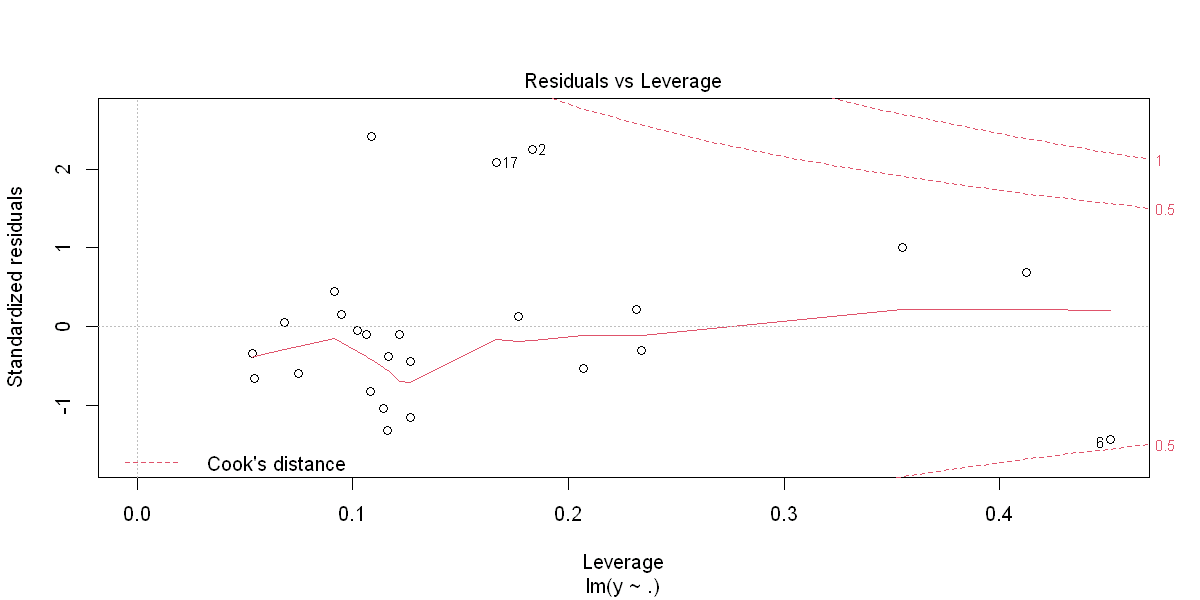

In [11]:
plot(second)

The `Residuals vs Fitted` plot showed a randomly distributed residuals around the fitted line as there's no discernable pattern of either decreasing or increasing in residuals as the fitted values increases. This indicates that the **errors terms are independent**. 

The `Normal Q-Q` plot on the other hand estimates that the residual distribution does not stray too far away from normal distribution or is **approximately normally distribute**. 

The `Scale-Location` shows a relatively horizantal line accross all range of fitted values indicating that the errors are **approximately equal in variance**.

Therefore, we could represent `Box` as a linear function of `Rate`, `User`, and `Meta` plus some error.

#### (d) Use statistical software to fit the following complete model for Box as a function of all six predictor variables :
$$E(Box) = \beta_0 + \beta_1 · Rate + \beta_2 · User + \beta_3 · Meta + \beta_4 · Len + \beta_5 · Win + \beta_6 · Nom$$

In [12]:
X <- df_2 %>%
    select(-c("Box", "Movie"))

third <- lm(y ~ ., data=X)
summary(third)


Call:
lm(formula = y ~ ., data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.161 -22.013  -3.864   9.517  84.574 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -172.28110  106.51894  -1.617   0.1232  
Rate          35.34769   22.44744   1.575   0.1327  
User           0.38894    0.19304   2.015   0.0591 .
Meta           1.25615    0.89110   1.410   0.1757  
Len            0.02473    0.54429   0.045   0.9643  
Win           -0.02080    1.33384  -0.016   0.9877  
Nom            0.37261    0.87286   0.427   0.6745  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.45 on 18 degrees of freedom
Multiple R-squared:  0.8854,	Adjusted R-squared:  0.8472 
F-statistic: 23.18 on 6 and 18 DF,  p-value: 1.505e-07


$$E(Box) = -172.28110 + 
35.34769 \cdot Rate + 
0.38894 \cdot User + 
1.25615 \cdot Meta + 
0.02473 \cdot Len + 
-0.02080 \cdot Win + 
0.37261 \cdot Nom$$

In [13]:
rss_3 <- sum(residuals(third)^2)

print(paste("RSS:", rss_3))

[1] "RSS: 32435.307635756"


#### (e) Use statistical software to fit the following reduced model:
$$E(Box) = \beta_0 + 
\beta_1 \cdot Rate + 
\beta_2 \cdot User + 
\beta_3 \cdot Meta$$

In [14]:
second


Call:
lm(formula = y ~ ., data = X)

Coefficients:
(Intercept)         Rate         User         Meta  
  -169.0862      35.4962       0.4328       1.2462  


$$E(Box) = -169.0862 + 
35.4962 \cdot Rate + 
0.4328 \cdot User + 
1.2462 \cdot Meta$$

In [15]:
rss_2 <- sum(residuals(second)^2)

print(paste("RSS:", rss_2))

[1] "RSS: 32822.9630548776"


#### (f) Compare the values of residual standard error (s) and adjusted R2 in the reduced and complete models

In [16]:
second_summary <- summary(second)

second_adj_r_squared <- second_summary$adj.r.squared

second_residual_se <- second_summary$sigma

print(paste("Adjusted R-squared (Reduced Model):", second_adj_r_squared))
print(paste("Residual standard error (Reduced Model):", second_residual_se))

[1] "Adjusted R-squared (Reduced Model): 0.867494395985699"
[1] "Residual standard error (Reduced Model): 39.5347725516217"


In [17]:
third_summary <- summary(third)

third_adj_r_squared <- third_summary$adj.r.squared

third_residual_se <- third_summary$sigma

print(paste("Adjusted R-squared (Complete Model):", third_adj_r_squared))
print(paste("Residual standard error (Complete Model):", third_residual_se))

[1] "Adjusted R-squared (Complete Model): 0.847235911449358"
[1] "Residual standard error (Complete Model): 42.4495174921904"


In [18]:
print(paste("ADJ_R^2 difference (Complete - Reduced):", third_adj_r_squared - second_adj_r_squared))

[1] "ADJ_R^2 difference (Complete - Reduced): -0.0202584845363406"


In [19]:
print(paste("Resid SE difference (Complete - Reduced):", third_residual_se - second_residual_se))

[1] "Resid SE difference (Complete - Reduced): 2.9147449405687"


It appears that the Reduced Model performed better! 

For **Adj $R^2$**, the reduced model is greater than complete model by around 2%. This means that `Rate`, `User`, and `Meta` to better explain the variance in `Box`, at least compared to using all the given feautures.

This insight was further supported by the fact the Residual Standard Error of reduced model is approximately 2.91 less than that of complete model. This simply means that the error term in reduced model is much more behave and thus attain more predictive credential (because the predictions are closer to the actual values) compared to complete model.

With all that been said, we can conclude that **reduced model fit better and thus perform better than the complete model** indicating that simpler model may sometimes be preferable compared to complex ones.